In [ ]:
import numpy as np

In [2]:
import torch

# List

In [6]:
my_list = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

In [7]:
my_list

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

# Numpy

In [10]:
np1 = np.random.rand(3,4)

In [11]:
np1

array([[0.75312357, 0.71560244, 0.40418611, 0.68835153],
       [0.06698436, 0.78766529, 0.8978729 , 0.96414632],
       [0.17051119, 0.78395733, 0.63957638, 0.5852864 ]])

In [12]:
np1.dtype

dtype('float64')

# Tensors

In [13]:
tensor_2d = torch.randn(3,4)
tensor_2d

tensor([[ 0.1257,  2.2835, -0.6849,  1.2514],
        [ 0.3018, -0.0843,  1.0997,  0.6603],
        [-0.6221,  1.8330, -0.1022,  0.1263]])

In [14]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [15]:
my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.7531, 0.7156, 0.4042, 0.6884],
        [0.0670, 0.7877, 0.8979, 0.9641],
        [0.1705, 0.7840, 0.6396, 0.5853]], dtype=torch.float64)

# Reshape and Slice

In [16]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [20]:
my_torch2 = torch.arange(10)

In [22]:
my_torch2 = my_torch2.reshape(2,-1)#automatically fit in the format with -1,of course can (-1,2) to fit the col
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [24]:
my_torch3 = torch.arange(10)
my_torch4 = my_torch3.view(2,5)
my_torch4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [3]:
my_tensor5 = torch.arange(10)
my_tensor6 = my_tensor5.reshape(2,5)
my_tensor6

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [6]:
my_tensor5[1] = 1234
my_tensor6

tensor([[   0, 1234,    2,    3,    4],
        [   5,    6,    7,    8,    9]])

In [7]:
my_torch7 = torch.arange(10)
my_torch7

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
my_torch7[7]#Grab a specific item

tensor(7)

In [11]:
my_torch8 = my_torch7.reshape(5,2)
my_torch8

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [12]:
my_torch8[:,1]

tensor([1, 3, 5, 7, 9])

In [13]:
my_torch8[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

# Tensor Math Operations

In [15]:
tensor_a = torch.tensor([1,2,3,4])
tensor_a
tensor_b = torch.tensor([5,6,7,8])
tensor_b

tensor([5, 6, 7, 8])

In [16]:
tensor_a + tensor_b#subtraction same

tensor([ 6,  8, 10, 12])

In [18]:
torch.add(tensor_a,tensor_b)

tensor([ 6,  8, 10, 12])

In [19]:
tensor_a * tensor_b

tensor([ 5, 12, 21, 32])

In [21]:
torch.mul(tensor_a,tensor_b)

tensor([ 5, 12, 21, 32])

In [22]:
tensor_b / tensor_a

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [23]:
torch.div(tensor_b,tensor_a)

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [25]:
tensor_b % tensor_a

tensor([0, 0, 1, 0])

In [26]:
torch.remainder(tensor_b,tensor_a)

tensor([0, 0, 1, 0])

In [27]:
torch.pow(tensor_a,tensor_b)

tensor([    1,    64,  2187, 65536])

In [40]:
tensor_c = torch.tensor([1,2,3,4])

In [41]:
tensor_c

tensor([1, 2, 3, 4])

In [38]:
tensor_b

tensor([5, 6, 7, 8])

In [42]:
#tensor_c = tensor_c + tensor_b
tensor_c.add_(tensor_b)

tensor([ 6,  8, 10, 12])

In [43]:
tensor_c

tensor([ 6,  8, 10, 12])

# A Basic Neural Network and Train

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class Model(nn.Module):
  #Input layer(4 features of the flower)
  #-->Hidden layer1(neurons)
  #-->H2-->...
  #-->output(3 classes of flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
   super().__init__() #initanitiate our nn.Module
   self.fc1 = nn.Linear(in_features, h1)#fc means fully connected
   self.fc2 = nn.Linear(h1, h2)
   self.out = nn.Linear(h2, out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x)) #rectified linear unit线性整流函数(阈值赋值)
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [5]:
torch.manual_seed(41) # Pick a manual seed for randomization
#Create an instance of model
model = Model()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [7]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [8]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

In [9]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
#Train text Split!
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [11]:
#Convert to numpy arrays
X = X.values
y = y.values

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
##train 80 percent ,test 20 percent


In [15]:
x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [16]:
#Set the criterion of the model to measure the error
criterion = nn.CrossEntropyLoss()
#Choose an optimizer:Adam learning rate = learning rate (if error doesn't go down after abunch of iterations,lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)




In [17]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [18]:
#Train
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)

  #measure loss
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i % 10 == 0:
   print(f'Epoch: {i} and loss: {loss}')

  #Do some back propagation

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epoch')

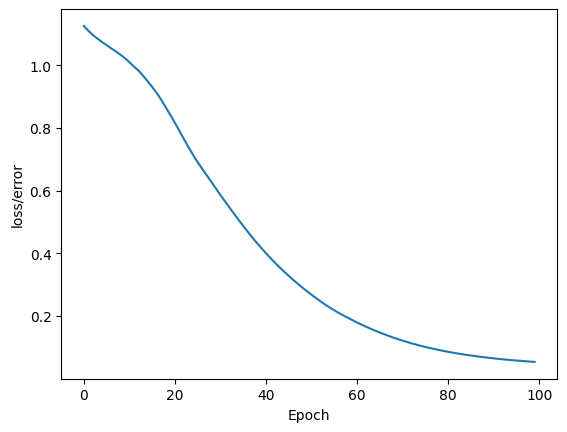

In [19]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [21]:
#Evaluate Model on Test Data set
with torch.no_grad(): #BAsically turn off back propagation
 y_eval = model.forward(x_test)
 loss = criterion(y_eval, y_test)


In [22]:
loss

tensor(0.1315)

In [30]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(x_test):
    y_val = model.forward(data)

    #tell the type our network think it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #corret or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'We got {correct} correct')


1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21.) tensor([-2.6161,  4.5584

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.7])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

In [ ]:
#save our nn model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')
#load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))
#make sure correctly
new_model.eval()